## Mini Project 2

#### Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Load given datasets

In [ ]:
train_orig = pd.read_csv(r'C:\Users\maria\OneDrive\Documents\EDU\INTERNSHIP\Projects\PROJECT 2 - CUSTOMER COMPLAINT\Datasets\Consumer_Complaints_train.csv')
test_orig = pd.read_csv(r'C:\Users\maria\OneDrive\Documents\EDU\INTERNSHIP\Projects\PROJECT 2 - CUSTOMER COMPLAINT\Datasets\Consumer_Complaints_test.csv')

# Creating copies of original datasets for transformation
train = train_orig.copy()
test = test_orig.copy()

#### Print top 5 records of train dataset

In [ ]:
train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


#### Print top 5 records of test dataset

In [ ]:
test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


**Note: Please note that do all given tasks for test and train both datasets.**

#### Print shape of train and test datasets

In [ ]:
print('Shape of train dataset: ',train.shape)
print('Shape of test dataset: ',test.shape)

Shape of train dataset:  (358810, 18)
Shape of test dataset:  (119606, 17)


#### Print columns of train and test datasets

In [ ]:
print('Columns in train dataset: \n',train.columns,'\n')
print('Columns in test dataset: \n',test.columns)

Columns in train dataset: 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object') 

Columns in test dataset: 
 Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')


#### Check data type for both datasets

In [ ]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358810 entries, 0 to 358809
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 358810 non-null  object
 1   Product                       358810 non-null  object
 2   Sub-product                   255024 non-null  object
 3   Issue                         358810 non-null  object
 4   Sub-issue                     139436 non-null  object
 5   Consumer complaint narrative  56180 non-null   object
 6   Company public response       67931 non-null   object
 7   Company                       358810 non-null  object
 8   State                         355907 non-null  object
 9   ZIP code                      355899 non-null  object
 10  Tags                          50226 non-null   object
 11  Consumer consent provided?    101580 non-null  object
 12  Submitted via                 358810 non-null  object
 13 

- The `train` dataset has:
- 18 features (17 categorical and 1 numerical)
- 358810 observations
- 8 features with missing values: ['Sub-product'], ['Sub-issue'], ['Consumer complaint narrative'], ['Company public response'], ['State'], ['ZIP code'], ['Tags'], ['Consumer consent provided?']
- Dataset fits in 413 MB

The target variable is ['Consumer disputed?']

In [ ]:
test.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119606 entries, 0 to 119605
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 119606 non-null  object
 1   Product                       119606 non-null  object
 2   Sub-product                   84923 non-null   object
 3   Issue                         119606 non-null  object
 4   Sub-issue                     46356 non-null   object
 5   Consumer complaint narrative  18914 non-null   object
 6   Company public response       22460 non-null   object
 7   Company                       119606 non-null  object
 8   State                         118670 non-null  object
 9   ZIP code                      118669 non-null  object
 10  Tags                          16977 non-null   object
 11  Consumer consent provided?    33907 non-null   object
 12  Submitted via                 119606 non-null  object
 13 

#### Print missing values in percentage

In [ ]:
# Missing values in train dataset

train.isnull().mean().sort_values(ascending=False)

Tags                            0.860021
Consumer complaint narrative    0.843427
Company public response         0.810677
Consumer consent provided?      0.716898
Sub-issue                       0.611393
Sub-product                     0.289251
ZIP code                        0.008113
State                           0.008091
Date sent to company            0.000000
Consumer disputed?              0.000000
Timely response?                0.000000
Company response to consumer    0.000000
Date received                   0.000000
Submitted via                   0.000000
Product                         0.000000
Company                         0.000000
Issue                           0.000000
Complaint ID                    0.000000
dtype: float64

- Out of the 8 columns (['Sub-product'], ['Sub-issue'], ['Consumer complaint narrative'], ['Company public response'], ['State'], ['ZIP code'], ['Tags'], ['Consumer consent provided?']) that have missing values, 6 have more than 25% data missing. These columns can be dropped.
We will determine imputation method for remaining 2 after further analysis

In [ ]:
# Missing values in test dataset

test.isnull().mean().sort_values(ascending=False)

Tags                            0.858059
Consumer complaint narrative    0.841864
Company public response         0.812217
Consumer consent provided?      0.716511
Sub-issue                       0.612427
Sub-product                     0.289977
ZIP code                        0.007834
State                           0.007826
Submitted via                   0.000000
Timely response?                0.000000
Company response to consumer    0.000000
Date sent to company            0.000000
Date received                   0.000000
Product                         0.000000
Company                         0.000000
Issue                           0.000000
Complaint ID                    0.000000
dtype: float64

#### Drop columns where more than 25% of the data are missing.

In [ ]:
columns_to_drop=['Tags','Consumer complaint narrative','Company public response','Consumer consent provided?','Sub-issue','Sub-product']

from feature_engine.selection import DropFeatures

#Instantiate
drop_missing_data = DropFeatures(features_to_drop = columns_to_drop)

# Fit-Transform
train = drop_missing_data.fit_transform(train)
test = drop_missing_data.fit_transform(test)

In [ ]:
# Checking for constant features

train.nunique().sort_values(ascending=False)

Complaint ID                    358810
ZIP code                         24181
Company                           3064
Date received                     1758
Date sent to company              1701
Issue                               95
State                               62
Product                             12
Submitted via                        6
Company response to consumer         6
Timely response?                     2
Consumer disputed?                   2
dtype: int64

This dataset has 2 binary features: ['Timely response?'] and ['Consumer disputed?'].
As ['Consumer disputed?'] is our target variable, binary classification algorithms may be the most suited for our predictions.

['Complaint ID'] has large number of unique values; judging by the name of the variable, this may be ordinal with no significance and we may have to drop it too.

#### Convert dates from object type to datetime type

In [ ]:
date_cols = ['Date received', 'Date sent to company']

for col in date_cols:
    train[col] = pd.to_datetime(train[col])
    test[col] = pd.to_datetime(test[col])

In [ ]:
# Check data types after conversion
train.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                      object
Complaint ID                             int64
dtype: object

In [ ]:
# Check data types of test dataset
test.dtypes

Date received                   datetime64[ns]
Product                                 object
Issue                                   object
Company                                 object
State                                   object
ZIP code                                object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Complaint ID                             int64
dtype: object

#### Extract Date, Month, and Year from the "Date Received" Column and create new fields for year, month, and day.

In [ ]:
# Extracting year, month, day in Train data

train['Year_Received'] = train['Date received'].dt.year
train['Month_Received'] = train['Date received'].dt.month
train['Day_Received'] = train['Date received'].dt.day
train.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26


In [ ]:
# Extracting year, month, day in Test data

test['Year_Received'] = test['Date received'].dt.year
test['Month_Received'] = test['Date received'].dt.month
test['Day_Received'] = test['Date received'].dt.day
test.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22


#### Calculate the Number of Days the Complaint was with the Company and create a new field as “Days held”

create new field with help given logic Like, Days held = Date sent to company - Date received <br>
Convert "Days Held" to Int(above column)

In [ ]:
# Creating "Days Held" column and storing value as Int

train['Days held'] = (train['Date sent to company'] - train['Date received']).dt.days
test['Days held'] = (test['Date sent to company'] - test['Date received']).dt.days

train.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0


In [ ]:
test.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0


#### Categorize Days into Weeks with the help of 'Days Received'

In [ ]:
# Define a function to compute week number

def WeekNo(Day):
    if Day<8:
        return 1
    elif Day<15:
        return 2
    elif Day<2:
        return 3
    else:
        return 4

# Add column 'Week' to train and test datasets
train['Week'] = train['Day_Received'].apply(WeekNo)
test['Week'] = test['Day_Received'].apply(WeekNo)

train.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held,Week
0,2015-10-14,Credit reporting,Incorrect information on credit report,Equifax,GA,30134,Web,2015-10-14,Closed with explanation,Yes,No,1605653,2015,10,14,0,2
1,2015-04-26,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613,2015,4,26,0,4


In [ ]:
test.head(2)

,Date received,Product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Year_Received,Month_Received,Day_Received,Days held,Week
0,2015-01-17,Credit card,Customer service / Customer relations,Citibank,TX,75241,Web,2015-01-17,Closed with monetary relief,Yes,1198133,2015,1,17,0,4
1,2016-06-22,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,76548,Phone,2016-06-22,Closed with explanation,Yes,1979989,2016,6,22,0,4


#### Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" amd "Day_Received" column

In [ ]:
columns_to_drop = ["Date received","Date sent to company","ZIP code", "Complaint ID", "Day_Received"]

# Instantiate
irrelevant_features = DropFeatures(features_to_drop=columns_to_drop)
# Fit-Transform
train = irrelevant_features.fit_transform(train)
test = irrelevant_features.fit_transform(test)

train.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4


In [ ]:
test.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,4
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4


#### Impute null values in "State" by Mode
(find mode and replace nan value)

In [ ]:
# Imputing null values in State with Mode using Categorical Imputer

from feature_engine.imputation import CategoricalImputer

# Instantiate
cat_imputer = CategoricalImputer(imputation_method = 'frequent')

# Fit-Transform
train = cat_imputer.fit_transform(train)
test = cat_imputer.fit_transform(test)

#### Check Missing Values in the dataset

In [ ]:
print('Missing values in Train data:')
train.isna().mean()

Missing values in Train data:


Product                         0.0
Issue                           0.0
Company                         0.0
State                           0.0
Submitted via                   0.0
Company response to consumer    0.0
Timely response?                0.0
Consumer disputed?              0.0
Year_Received                   0.0
Month_Received                  0.0
Days held                       0.0
Week                            0.0
dtype: float64

In [ ]:
print('Missing values in Test data:')
test.isna().mean()

Missing values in Test data:


Product                         0.0
Issue                           0.0
Company                         0.0
State                           0.0
Submitted via                   0.0
Company response to consumer    0.0
Timely response?                0.0
Year_Received                   0.0
Month_Received                  0.0
Days held                       0.0
Week                            0.0
dtype: float64

- There are now no missing values in both the datasets.

#### Print head of train and test dataset and observe

In [ ]:
train.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4


In [ ]:
test.head(2)

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,4
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4


#### Store data of the disputed consumer in the new data frame as "disputed_cons"

In [ ]:
disputed_cons = train[train['Consumer disputed?']=='Yes']
disputed_cons.shape

(76172, 12)

In [ ]:
train['Consumer disputed?'].value_counts()

Consumer disputed?
No     282638
Yes     76172
Name: count, dtype: int64

#### Plot bar graph for the total no of disputes with the help of seaborn

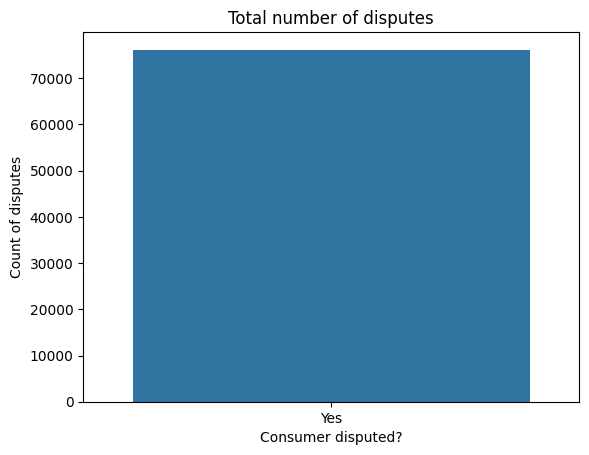

In [ ]:
sns.countplot(data=disputed_cons, x='Consumer disputed?')
plt.title('Total number of disputes')
plt.ylabel('Count of disputes')
plt.show()

#### Plot bar graph for the total no of disputes products-wise with help of seaborn

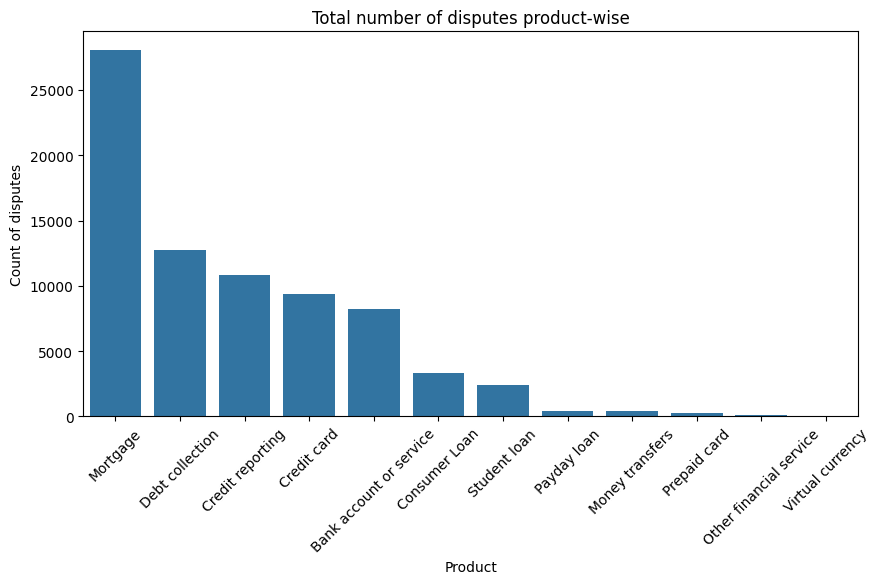

In [ ]:
# Create aggregated data for plotting
temp = pd.DataFrame(disputed_cons.groupby('Product')['Consumer disputed?'].count().sort_values(ascending=False))

# Plot the bar graph
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Total number of disputes product-wise')
plt.ylabel('Count of disputes')
plt.xticks(rotation=45)
plt.show()

#### Plot bar graph for the total no of disputes with Top Issues by Highest Disputes , with help of seaborn

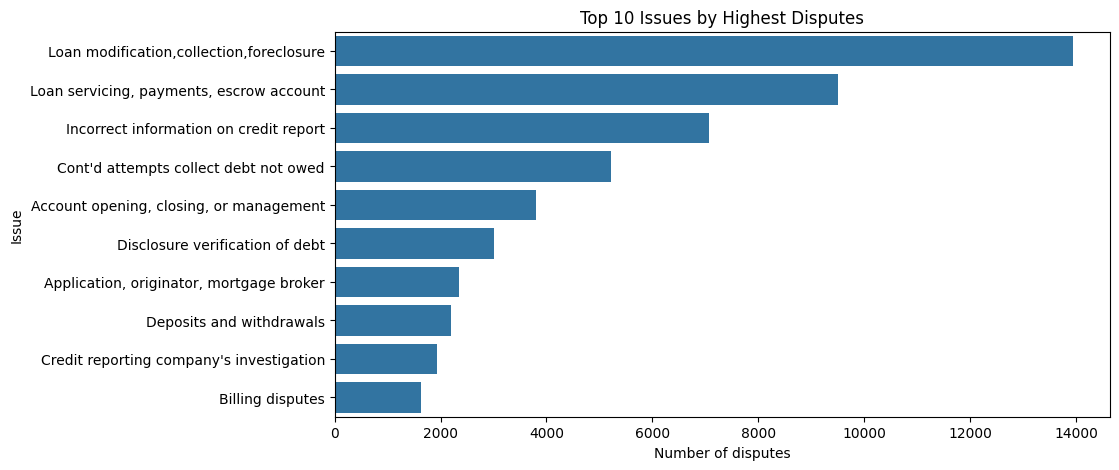

In [ ]:
temp = pd.DataFrame(disputed_cons.groupby('Issue')['Consumer disputed?'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y=temp.index, x='Consumer disputed?')
plt.title('Top 10 Issues by Highest Disputes')
plt.xlabel('Number of disputes')
plt.show()

#### Plot bar graph for the total no of disputes by State with Maximum Disputes

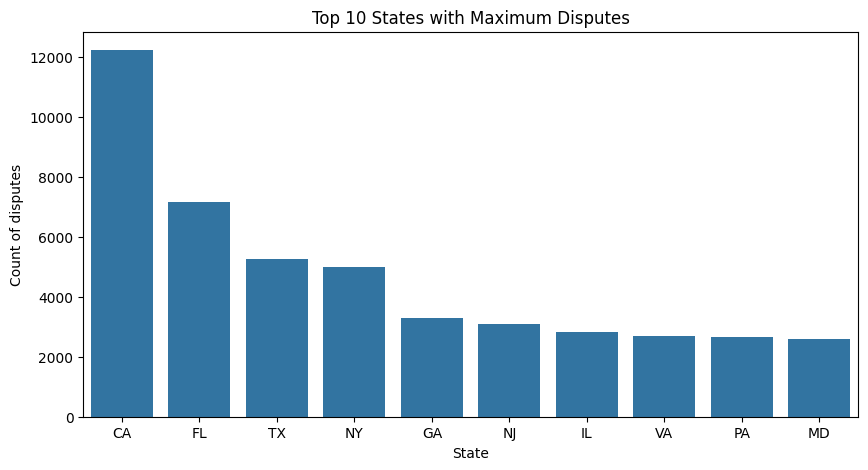

In [ ]:
temp = pd.DataFrame(disputed_cons.groupby('State')['Consumer disputed?'].count().sort_values(ascending=False).head(10))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Top 10 States with Maximum Disputes')
plt.ylabel('Count of disputes')
plt.show()

#### Plot bar graph for the total no of disputes by Submitted Via diffrent source

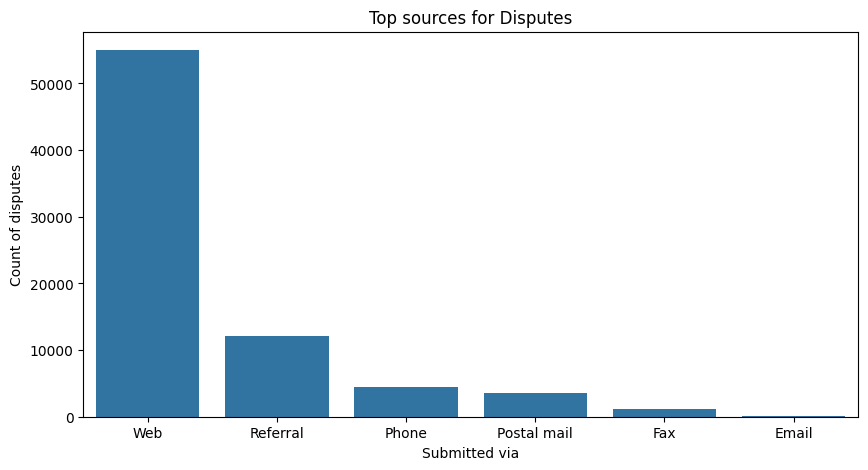

In [ ]:
temp = pd.DataFrame(disputed_cons.groupby('Submitted via')['Consumer disputed?'].count().sort_values(ascending=False))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x=temp.index, y='Consumer disputed?')
plt.title('Top sources for Disputes')
plt.ylabel('Count of disputes')
plt.show()

#### Plot bar graph for the total no of disputes where the Company's Response to the Complaints

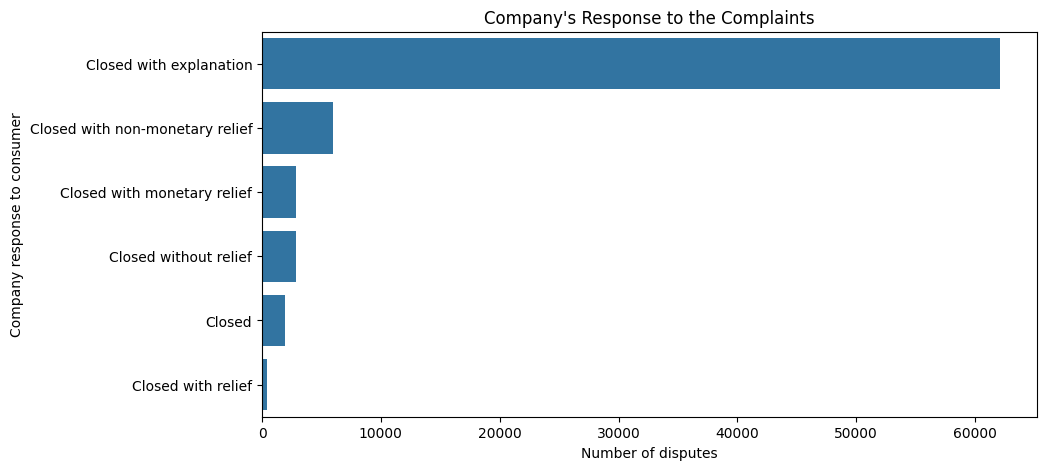

In [ ]:
temp = pd.DataFrame(disputed_cons.groupby('Company response to consumer')['Consumer disputed?'].count().sort_values(ascending=False))

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y=temp.index, x='Consumer disputed?')
plt.title("Company's Response to the Complaints")
plt.xlabel('Number of disputes')
plt.show()

#### Plot bar graph for the total no of disputes where Company's Response Leading to Disputes

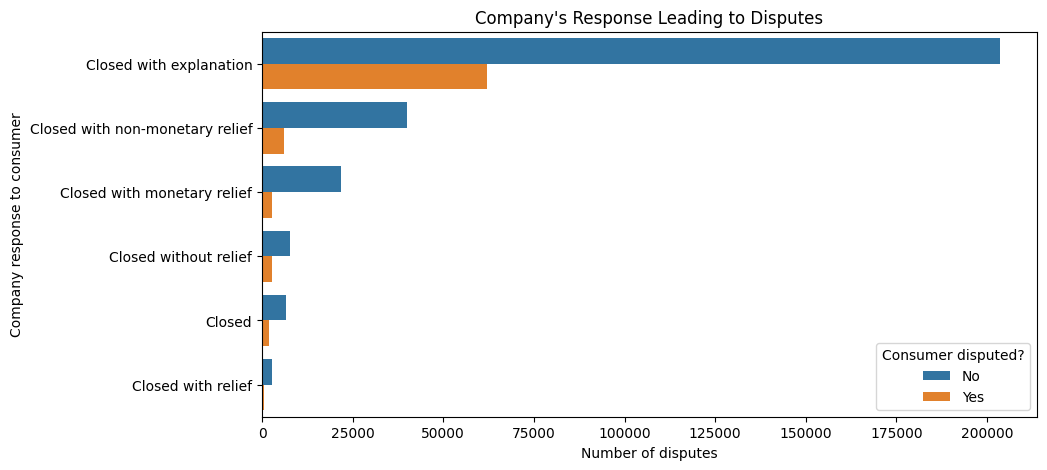

In [ ]:
temp = pd.DataFrame(train.groupby(['Company response to consumer','Consumer disputed?'])['Consumer disputed?'].count())\
.rename(columns={'Consumer disputed?':'Values'}).reset_index()
temp.sort_values(by='Values', ascending=False, inplace=True)


plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y='Company response to consumer', x='Values', hue='Consumer disputed?')
plt.title("Company's Response Leading to Disputes")
plt.xlabel('Number of disputes')
plt.show()

#### Plot bar graph for the total no of disputes Whether there are Disputes Instead of Timely Response

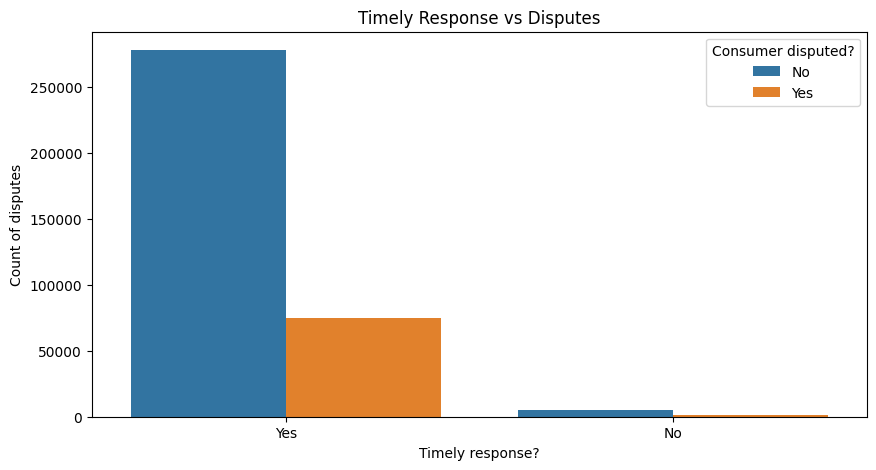

In [ ]:
temp = pd.DataFrame(train.groupby(['Timely response?','Consumer disputed?'])['Consumer disputed?'].count())\
.rename(columns={'Consumer disputed?':'Values'}).reset_index()
temp.sort_values(by='Values', ascending=False, inplace=True)


plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x='Timely response?', y='Values', hue='Consumer disputed?')
plt.title("Timely Response vs Disputes")
plt.ylabel('Count of disputes')
plt.show()

#### Plot bar graph for the total no of disputes over Year Wise Complaints

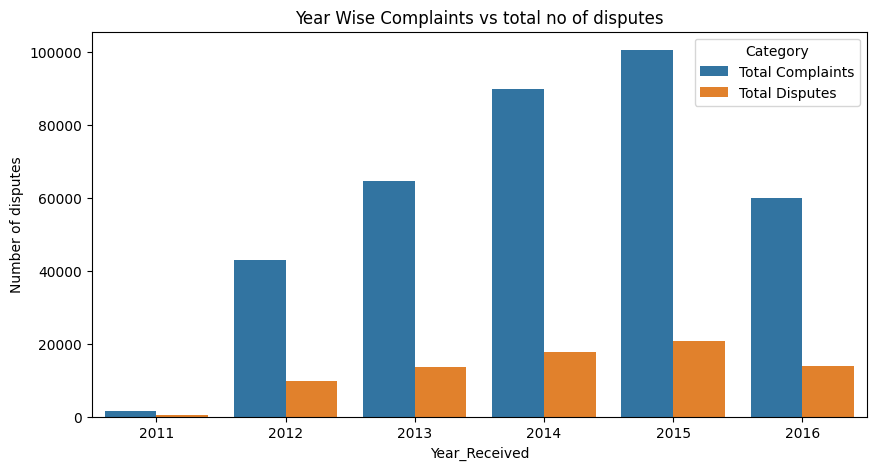

In [ ]:
temp = pd.DataFrame(train.groupby(['Year_Received'])['Consumer disputed?'].count()).rename(columns={'Consumer disputed?':'Total Complaints'})
temp['Total Disputes'] = disputed_cons.groupby(['Year_Received'])['Consumer disputed?'].count()
temp.reset_index(inplace=True)
temp = temp.melt(id_vars='Year_Received',var_name='Category', value_name='Value' )


plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, x='Year_Received', y='Value', hue='Category')
plt.title("Year Wise Complaints vs total no of disputes")
plt.ylabel('Number of disputes')
plt.show()

#### Plot bar graph for the total no of disputes over Year Wise Disputes

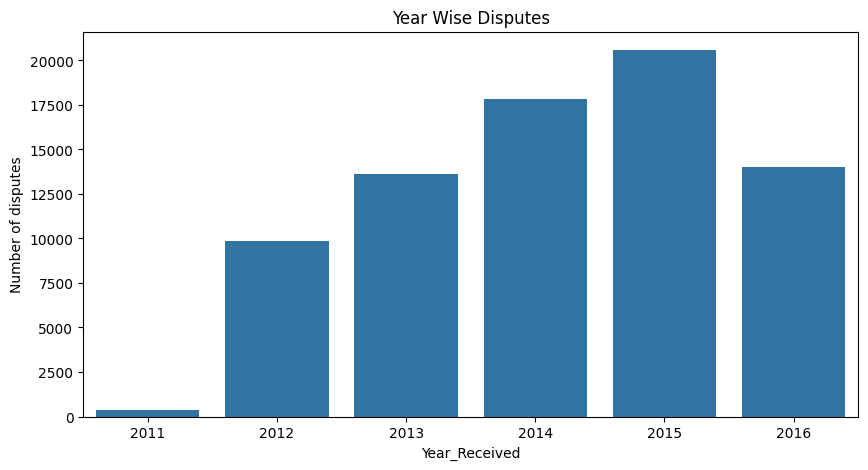

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=disputed_cons, x='Year_Received')
plt.title("Year Wise Disputes")
plt.ylabel('Number of disputes')
plt.show()

#### Plot  bar graph for the top companies with highest complaints

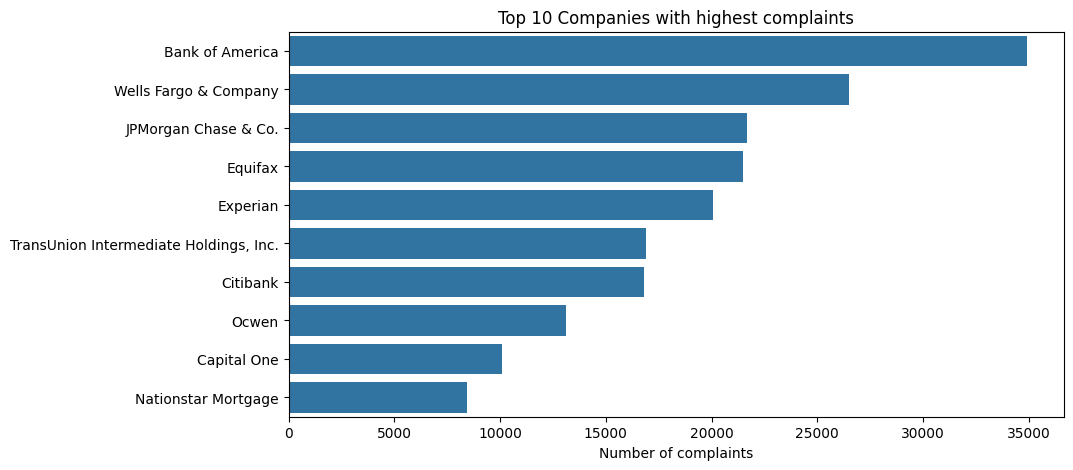

In [ ]:
temp = pd.DataFrame(train.groupby(['Company'])['Consumer disputed?'].count())\
.rename(columns={'Consumer disputed?':'Values'}).reset_index()
temp = temp.sort_values(by='Values', ascending=False).head(10)

plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=temp, y='Company', x='Values' )
plt.title("Top 10 Companies with highest complaints")
plt.xlabel('Number of complaints')
plt.ylabel('')
plt.show()

#### "Days Held" Column Analysis(describe)

In [ ]:
train.describe()

,Year_Received,Month_Received,Days held,Week
count,358810.000000,358810.000000,358810.000000,358810.000000
mean,2014.183629,6.151858,4.456339,2.851361
std,1.268063,3.356024,16.741676,1.286685
min,2011.000000,1.000000,-1.000000,1.000000
25%,2013.000000,3.000000,0.000000,2.000000
50%,2014.000000,6.000000,1.000000,4.000000
75%,2015.000000,9.000000,4.000000,4.000000
max,2016.000000,12.000000,993.000000,4.000000


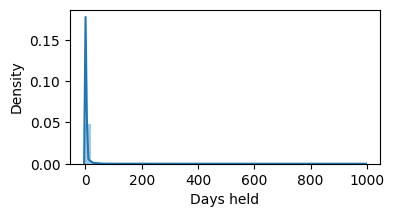

In [ ]:
plt.figure(figsize=(4,2))
sns.distplot(train['Days held'])
plt.show()

['Days held'] analysis
- It ranges from -1 to 993
- It has a right tail as mean is greater that the median

#### Convert Negative Days Held to Zero(it is the time taken by authority can't be negative)

In [ ]:
train['Days held'] = train['Days held'].apply(lambda x: 0 if x < 0 else x)
test['Days held'] = test['Days held'].apply(lambda x: 0 if x < 0 else x)

#### Text pre-processing
(It will be cover in upcoming calsses)

In [ ]:
import nltk
import string
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\maria\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
relevant_text_train = train['Issue']
relevant_text_test = test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [ ]:
train['Issues_cleaned'] = clean_data_train
test['Issues_cleaned'] = clean_data_test
train = train.drop('Issue', axis = 1)
test = test.drop('Issue', axis = 1)

#### Drop Unnecessary Columns for the Model Building<br>
like:'Company', 'State', 'Year_Received', 'Days_held'

In [ ]:
from feature_engine.selection import DropFeatures

irrelevant_features = ['Company', 'State', 'Year_Received', 'Days held']

# Instantiate
drop_irrelevant_features = DropFeatures(features_to_drop = irrelevant_features)

# Fit-transform
train = drop_irrelevant_features.fit_transform(train)
test = drop_irrelevant_features.fit_transform(test)

In [ ]:
train.head(2)

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Week,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,No,10,2,incorrect inform on credit report
1,Bank account or service,Web,Closed with explanation,Yes,Yes,4,4,deposit and withdraw


#### Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

In [ ]:
train['Consumer disputed?'] = np.where(train['Consumer disputed?']=='Yes',1,0)
train.head(2)

,Product,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Month_Received,Week,Issues_cleaned
0,Credit reporting,Web,Closed with explanation,Yes,0,10,2,incorrect inform on credit report
1,Bank account or service,Web,Closed with explanation,Yes,1,4,4,deposit and withdraw


#### Create Dummy Variables for catagorical features
like: 'Product', 'Submitted via', 'Company response to consumer', 'Timely response?'

In [ ]:
encoded_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']

# Create empty dataframes for train and test dummy variables
dummy_train=pd.DataFrame()
dummy_test=pd.DataFrame()

# Using get_dummies for column encoding in train and test datasets
for i,col in enumerate(encoded_cols):
    trn = pd.get_dummies(train[col], prefix=col).astype(int)
    tst = pd.get_dummies(test[col], prefix=col).astype(int)
    dummy_train = pd.concat([dummy_train,trn], axis=1)
    dummy_test = pd.concat([dummy_test,tst], axis=1)

dummy_test.head()

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Submitted via_Referral,Submitted via_Web,Company response to consumer_Closed,Company response to consumer_Closed with explanation,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


#### Concate Dummy Variables and Drop the Original Columns

In [ ]:
# Concatenate dummy variables with original dataframe
train = pd.concat([dummy_train,train], axis=1)
test = pd.concat([dummy_test,test], axis=1)

# Drop original columns
train.drop(columns=encoded_cols, inplace=True)
test.drop(columns=encoded_cols, inplace=True)

train.head(2)

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Company response to consumer_Closed with monetary relief,Company response to consumer_Closed with non-monetary relief,Company response to consumer_Closed with relief,Company response to consumer_Closed without relief,Timely response?_No,Timely response?_Yes,Consumer disputed?,Month_Received,Week,Issues_cleaned
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,10,2,incorrect inform on credit report
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,4,4,deposit and withdraw


#### Calculating TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names_out(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


#### Replacing Issues_cleaned by Vectorized Issues

In [ ]:
train = train.drop('Issues_cleaned', axis = 1)
test = test.drop('Issues_cleaned', axis = 1)
train = pd.concat([train, issues_train], axis = 1)
test = pd.concat([test, issues_test], axis = 1)
Feature168 = [0] * 119606
test['Feature168'] = Feature168

#### observe train and test datasets

In [ ]:
train.head()

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [ ]:
test.head()

,Product_Bank account or service,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,Product_Prepaid card,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,0,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,0,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


#### Observe Shape of new Train and Test Datasets

In [ ]:
train.shape

(358810, 197)

In [ ]:
test.shape

(119606, 196)

#### Split the Data Sets Into X and Y by dependent and independent variables


In [ ]:
X = train.drop(columns='Consumer disputed?')
y = train['Consumer disputed?']
X_test = test

#### Split data into Train and Test datasets
(for test data use test excel file data)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Shapes of the datasets

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((287048, 196), (71762, 196), (287048,), (71762,), (119606, 196))

#### Scaling the Data Sets (note:discard dependent variable before doing standardization)

#### Do feature selection with help of PCA

Select top features which are covering 80% of the information
(n=53),
<br>store this data into new dataframe,

In [ ]:
# Import required libraries for Scaling and PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Create the Transformer pipeline

from sklearn.pipeline import Pipeline

steps=[]
# Add Standard scaler and PCA to the pipeline
steps.append(('scaler', StandardScaler()))
steps.append(('dim_red', PCA(n_components=53)))

# Instantiate
transformer_pipe = Pipeline(steps)

# Fit
transformer_pipe.fit(X_train, y_train)

# Transform
X_train_transformed = transformer_pipe.transform(X_train)
X_val_transformed = transformer_pipe.transform(X_val)
X_test_transformed = transformer_pipe.transform(X_test)

# Save pipeline to pickle file
import pickle

with open('transformer_pipe.pkl', wb) as f:
  pickle.dump(transformer_pipe, f)

**Model building**
Build given models and mesure their test and validation accuracy
build given models:
1. LogisticRegression
2. DecisionTreeClassifier
3. RandomForestClassifier
4. AdaBoostClassifier
5. GradientBoostingClassifier
6. KNeighborsClassifier
7. XGBClassifier

In [ ]:
# Import algorithms to try

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
import time

**LOGISTIC REGRESSION**

---



**solver** {‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
- Algorithm to use in the optimization problem. Default is ‘lbfgs’.
- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;
- ‘liblinear’ and ‘newton-cholesky’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrapt it with the OneVsRestClassifier.
- ‘newton-cholesky’ is a good choice for n_samples >> n_features, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features because it explicitly computes the Hessian matrix.


**C** float, default=1.0
- Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

**penalty** {‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

- None: no penalty is added;
- 'l2': add a L2 penalty term and it is the default choice;
- 'l1': add a L1 penalty term;
- 'elasticnet': both L1 and L2 penalty terms are added.

In [ ]:
# Define algorithms to try

algorithms = [
             ('Logistic Regression', LogisticRegression(solver='newton-cholesky', penalty='l2', C=0.001)),

             ('Decision Tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10)),

             ('Random Forest', RandomForestClassifier(n_estimators=100,max_depth=5, min_samples_leaf=4, min_samples_split=10)),

             ('Ada Boost', AdaBoostClassifier(n_estimators=100, learning_rate=0.5)),

             ('Gradient Boost', GradientBoostingClassifier(max_depth=5)),

             ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),

             ('XG Boost', XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.5, objective='binary:logistic'))
             ]

**DECISION TREES**

---



min_samples_split :
- min no. of observations that will lead to a split
- increase to prevent overfitting
- 0.1/ 0.01 of total observations

min_samples_leaf:
- min no. of obserations for node to become a leaf node
- takes odd values (3, 5, ..) for imbalanced datasets


**XGBOOST**

---

objective:
- specifies the learning task eg. reg: logistic, multi: softmax

In [ ]:
# Define a function to evaluate model performance

def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Fit
    start_time = time.time()
    model.fit(X_train, y_train)
    runtime = time.time()-start_time

    #Predict
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Evaluate
    return {'Test Accuracy Score' : accuracy_score(y_test, y_test_pred),
            'Train Accuracy Score' : accuracy_score(y_train, y_train_pred),
            'Run time (in secs)' : runtime
           }

In [ ]:
# Evaluate each model in algorithms

results=[]
for name, model in algorithms:
    metrics = evaluate_model(model, X_train_transformed, X_val_transformed, y_train, y_val)

    results.append({'Algorithm' : name,
                    **metrics})

# Create a dataframe for comparison
model_comparison = pd.DataFrame(results).sort_values('Test Accuracy Score', ascending=False)
model_comparison

,Algorithm,Test Accuracy Score,Train Accuracy Score,Run time (in secs)
0,Logistic Regression,0.787631,0.787729,1.566234
1,Decision Tree,0.787631,0.787736,7.351945
2,Random Forest,0.787631,0.787729,72.157856
3,Ada Boost,0.787631,0.787729,152.260534
4,Gradient Boost,0.787506,0.787983,620.047481
6,XG Boost,0.786837,0.788861,5.071975
5,K-Nearest Neighbors,0.748377,0.760528,0.045469


We see that Logistic Regression has the best performance in terms of accuracy for both training and test datasets. Hence, we will use Logistic Regression as the final model for prediction.

#### Final Model and Prediction for test data file

In [ ]:
# Final model instantiation
lr = LogisticRegression(solver='newton-cholesky', penalty='l2', C=0.001)

# Fit
lr.fit(X_train_transformed, y_train)

# Predict consumer dispute and append to original dataframe
test_orig['Consumer disputed'] = lr.predict(X_test_transformed)
test_orig.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID,Consumer disputed
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133,0
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989,0
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090,0
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306,0
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667,0


#### Export Predictions to CSV

In [ ]:
test_orig.to_csv('Consumer_Complaints_predicted.csv', index=False)

## End of Project